In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


c:\Users\greyl\PyExplore\virtual_env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


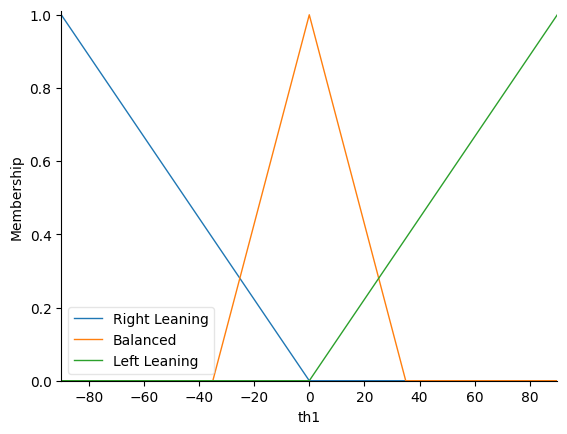

In [19]:
# membership function for theta
th1_range = np.arange(-90, 91, 1)
th1 = ctrl.Antecedent(th1_range, 'th1')

th1['Right Leaning'] = fuzz.trimf(th1_range, [-90, -90, 0])# fuzz.sigmoid(th1_range, 180, 2)
th1['Balanced'] = fuzz.trimf(th1_range, [-35, 0, 35])# fuzz.sigmoid(th1_range, 180, 2)
th1['Left Leaning'] = fuzz.trimf(th1_range, [0, 90, 90])
th1.view()


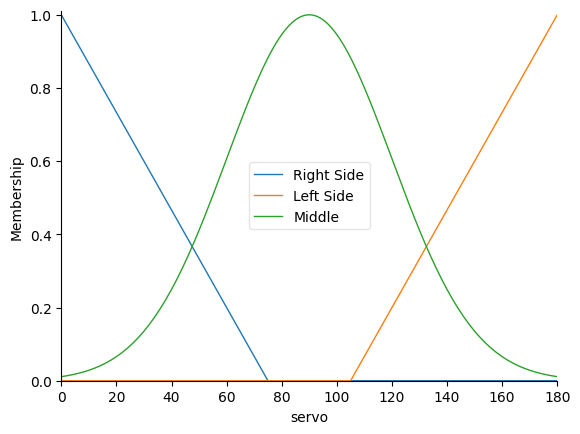

In [20]:
# membership function for stabilizing by moving servo angle
servo_range = np.arange(0, 181, 1)
servo = ctrl.Antecedent(servo_range, 'servo')

servo['Right Side'] = fuzz.trimf(servo_range, [0, 0, 75])
servo['Left Side'] = fuzz.trimf(servo_range, [105, 180, 180])
servo['Middle'] = fuzz.gaussmf(servo_range, 90, 30)
servo.view()


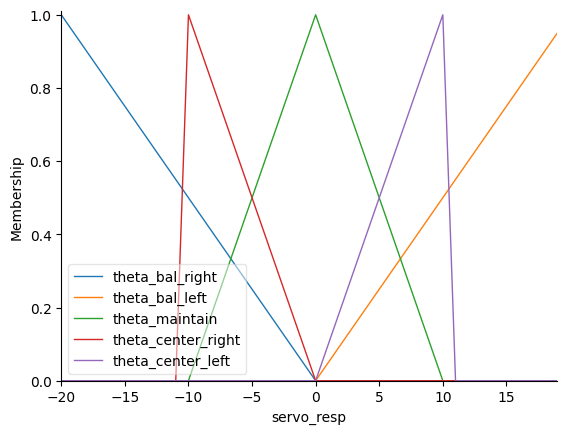

In [21]:
# membership function for stabilizing by moving servo angle
servo_resp_range = np.arange(-20, 20, 1)
servo_resp = ctrl.Consequent(servo_resp_range, 'servo_resp')

servo_resp['theta_bal_right'] = fuzz.trimf(servo_resp_range, [-20, -20, 0])
servo_resp['theta_bal_left'] = fuzz.trimf(servo_resp_range, [0, 20, 20])
servo_resp['theta_maintain'] = fuzz.trimf(servo_resp_range, [-10, 0, 10])

servo_resp['theta_center_right'] = fuzz.trimf(servo_resp_range, [-10, -10, 0])
servo_resp['theta_center_left'] = fuzz.trimf(servo_resp_range, [0, 10, 10])
# servo['theta_cmd_middle'] = fuzz.gaussmf(servo_range, 90, 30)


servo_resp.view()


c:\Users\greyl\PyExplore\virtual_env\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


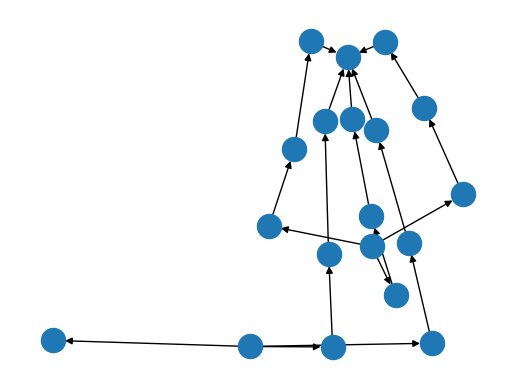

In [23]:
# creating rules...
rule1 = ctrl.Rule(th1['Right Leaning'], servo_resp['theta_bal_right'])
rule2 = ctrl.Rule(th1['Left Leaning'], servo_resp['theta_bal_left'])
rule3 = ctrl.Rule(th1['Balanced'], servo_resp['theta_maintain'])
rule4 = ctrl.Rule(servo['Right Side'], servo_resp['theta_center_right'])
rule5 = ctrl.Rule(servo['Left Side'], servo_resp['theta_center_left'])

servo_rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
servo_control = ctrl.ControlSystemSimulation(servo_rules)

# displaying rule views
servo_rules.view()


In [28]:
def sc_comp(th, servo_a):
    servo_control.input['th1'] = th
    servo_control.input['servo'] = servo_a
    servo_control.compute()
    sc_output = servo_control.output['servo_resp']
    return sc_output

Text(0, 0.5, 'servo_response')

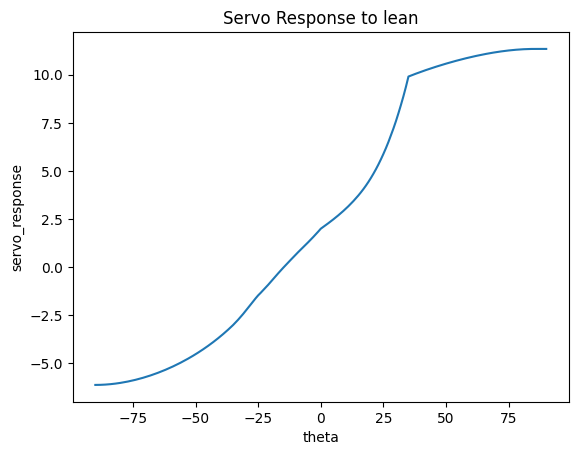

In [35]:
# getting actual response from control module
from Pi.fuzz_control import servo_reponse
import matplotlib.pyplot as plt

serv_a = []
sim_range = th1_range


for th in sim_range:
    serv_a.append(sc_comp(th, 180))

fig, ax = plt.subplots()
ax.plot(sim_range, serv_a)
ax.set_title('Servo Response to lean')
ax.set_xlabel('theta')
ax.set_ylabel('servo_response')



In [ ]:
# simulate...

servo = 5

# compute servo_response
servo_send = servo+servo_resp
if 0 < servo_send+servo_resp < 180:
    # send servo
    pass
else:
    servo_send = min()